# MNIST Handwritten Digits Classification using Stochastic Gradient Descent (SGD)

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn import metrics as ms
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import pickle

## Read the data

In [2]:
mnist_digits = fetch_openml('mnist_784', version=1)


/home/min/anaconda3/envs/data_science/lib/python3.11/site-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
mnist_digits.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
x = mnist_digits['data']
y = mnist_digits['target']

In [5]:
x.shape, y.shape

((70000, 784), (70000,))

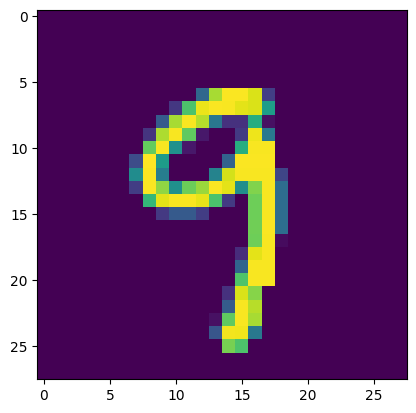

In [6]:
index = np.random.randint(x.shape[0])
example = x.loc[[index]].to_numpy().reshape(28, 28)
plt.imshow(example)

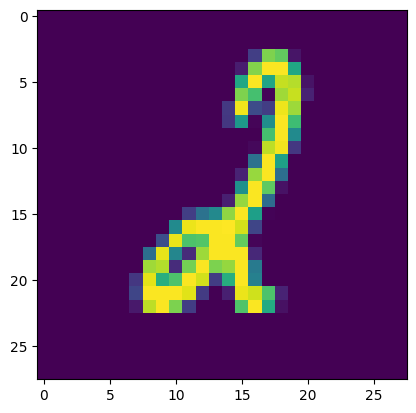

In [7]:
index = np.random.randint(x.shape[0])
example = x.loc[[index]].to_numpy().reshape(28, 28)
plt.imshow(example)

## Split dataset

In [8]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

## Train the model

In [9]:
model = SGDClassifier(random_state=8964)
model.fit(X_train, y_train)

SGDClassifier(random_state=8964)

## Evaluate the model

In [10]:
from sklearn.metrics import accuracy_score
predictions = model.predict(X_test)
accuracy = accuracy_score(y_pred=y_test, y_true=predictions)


In [11]:
scores = cross_val_score(model, X_test, y_test, cv=5)
scores

array([0.88047619, 0.86952381, 0.88333333, 0.84142857, 0.87547619])

<Axes: >

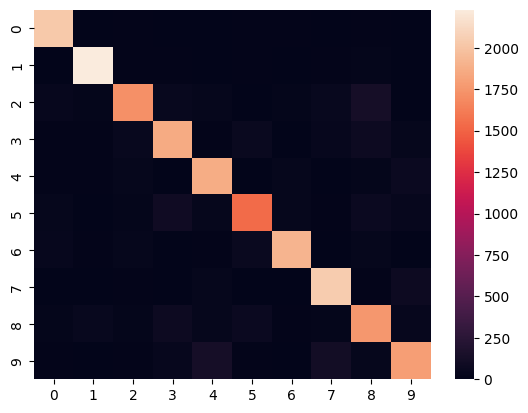

In [12]:
cm = confusion_matrix(y_pred=predictions, y_true=y_test)
sns.heatmap(cm, annot=False)

## Using CNN

In [13]:
X_train /= 255
X_test /= 255

X_train_reshaped = X_train.to_numpy().reshape(49000, 28, 28, 1)
X_test_reshaped = X_test.to_numpy().reshape(-1, 28, 28, 1)

In [14]:
from tensorflow import keras

y_train_encoded = keras.utils.to_categorical(y_train, 10)
y_test_encoded = keras.utils.to_categorical(y_test, 10)

Input_shape = X_train_reshaped.shape[1:]

2024-01-18 16:31:37.102392: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-01-18 16:31:37.119706: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-18 16:31:37.119726: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-18 16:31:37.120325: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-18 16:31:37.123523: I tensorflow/core/platform/cpu_feature_guar

In [15]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam

cnn_model = Sequential()

cnn_model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=Input_shape))
cnn_model.add(MaxPooling2D(2, 2))

cnn_model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
cnn_model.add(AveragePooling2D(2, 2))

cnn_model.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu'))
cnn_model.add(MaxPooling2D(2, 2))
cnn_model.add(Dropout(0.3))

cnn_model.add(Flatten())
cnn_model.add(Dense(units=512, activation='relu'))
cnn_model.add(Dense(units=256, activation='relu'))

cnn_model.add(Dense(units=10, activation='softmax'))

cnn_model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

2024-01-18 16:31:37.809800: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-01-18 16:31:37.829211: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-01-18 16:31:37.829320: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [16]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 128)       73856     
                                                                 
 average_pooling2d (Average  (None, 5, 5, 128)         0         
 Pooling2D)                                                      
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 256)         295168    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 1, 1, 256)         0

In [17]:
history = cnn_model.fit(X_train_reshaped, y_train_encoded, batch_size=32, epochs=20)

Epoch 1/20


2024-01-18 16:31:38.535411: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
2024-01-18 16:31:38.606092: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8902
2024-01-18 16:31:38.658781: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-01-18 16:31:38.854722: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-01-18 16:31:39.091987: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f1dc5082ce0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-01-18 16:31:39.092003: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 40

1532/1532 [==============================] - 5s 2ms/step - loss: 0.2280 - accuracy: 0.9300
Epoch 2/20
1532/1532 [==============================] - 3s 2ms/step - loss: 0.0834 - accuracy: 0.9753
Epoch 3/20
1532/1532 [==============================] - 3s 2ms/step - loss: 0.0629 - accuracy: 0.9817
Epoch 4/20
1532/1532 [==============================] - 3s 2ms/step - loss: 0.0516 - accuracy: 0.9848
Epoch 5/20
1532/1532 [==============================] - 3s 2ms/step - loss: 0.0408 - accuracy: 0.9875
Epoch 6/20
1532/1532 [==============================] - 3s 2ms/step - loss: 0.0365 - accuracy: 0.9891
Epoch 7/20
1532/1532 [==============================] - 3s 2ms/step - loss: 0.0318 - accuracy: 0.9907
Epoch 8/20
1532/1532 [==============================] - 3s 2ms/step - loss: 0.0275 - accuracy: 0.9919
Epoch 9/20
1532/1532 [==============================] - 3s 2ms/step - loss: 0.0276 - accuracy: 0.9921
Epoch 10/20
1532/1532 [==============================] - 3s 2ms/step - loss: 0.0223 - accurac

In [18]:
cnn_evaluations = cnn_model.evaluate(X_test_reshaped, y_test_encoded)

657/657 [==============================] - 1s 920us/step - loss: 0.0563 - accuracy: 0.9882


657/657 [==============================] - 0s 571us/step


<Axes: >

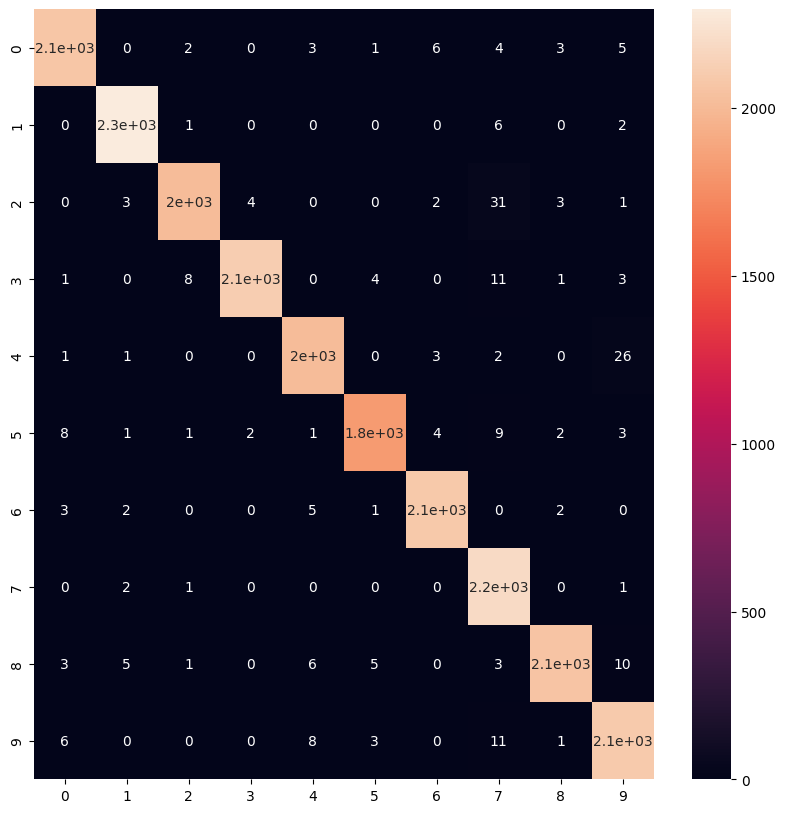

In [22]:
y_test_arg = y_test_encoded.argmax(1)

cnn_predictions = cnn_model.predict(X_test_reshaped)
predicted_classes = cnn_predictions.argmax(1)

cm1 = confusion_matrix(y_test_arg, predicted_classes)
plt.figure(figsize=(10, 10))
sns.heatmap(cm1, annot=True)